# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

Y balanceada no teste? Errado. Quem tem que estar balanceado é o y no treino. Nossa base de teste precisa estar desbalanceada.

In [4]:
x_train = pd.read_csv('x_train_balanced')
y_train = pd.read_csv('y_train_balanced')
x_test = pd.read_csv('x_test')
y_test = pd.read_csv('y_test')

x_train

,Age,Income,Number of Children,gender_encoded,marital_status_encoded,home_ownership_encoded,bachelor_degree,doctorate,high_school,master_degree
0,26.000000,45000.000000,0,0,1,1,0,0,0,0
1,29.000000,27500.000000,0,0,1,1,0,0,1,0
2,25.000000,62500.000000,0,0,1,1,1,0,0,0
3,29.000000,68000.000000,2,0,0,0,0,1,0,0
4,31.000000,65000.000000,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
247,29.950365,43703.466973,0,0,1,1,0,0,0,0
248,34.000000,47500.000000,0,1,1,1,0,0,0,0
249,30.347552,57500.000000,0,0,1,1,0,0,0,0
250,25.000000,60063.547817,0,0,1,1,1,0,0,0


In [19]:
y_train

,credit_score_encoded
0,1
1,0
2,1
3,1
4,1
...,...
247,1
248,1
249,1
250,1


In [22]:
y_train.value_counts()

,count
credit_score_encoded,
0,84
1,84
2,84


In [23]:
y_test.value_counts()

,count
credit_score_encoded,
2,29
0,6
1,6


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

A elaboração de um modelo ou a aplicação de um algoritmo como a árvore de decisão e Naive Bayes começa no tratamento de dados. Etapa essa que talvez concentre o maior esforço do cientista de dados, pois nesse momento uma avaliação criteriosa pode ser necessária.
Durante a etapa de preparação de dados é necessária realizar diversas coisas, como a verificação dos tipos de dados, presença de dados faltantes, análise para busca de outliers, analisar algumas métricas para definir como os outliers serão tratados, buscar as relações entre os dados e gerar visualizações gráficas trazendo alguns insights e a adequação desses dados.
Essa adequação também pode requerer uma análise cuidadosa, pois muitas vezes é necessário a conversão de dados categóricos para dados numéricos (utilizando ferramentas como LabelEncoder ou OneHotEncoding), balanceamento dos dados para evitar o Overfitting e separação dos dados em dados de treino e teste.
A partir de então, podemos aplicar os algoritmos de previsão como a Regressão Linear, Naive Bayes ou Árvore de decisão, tomando cuidado para utilizar as bases separadas corretamente.
Diante das aplicações, podemos aplicar os códigos de avaliação dos modelos. Dentre as formas de avaliação, citamos as métricas apresentadas como Accuracy, Precision e f1 score. Além disso, a matriz de confusão também nos tras um panorama visual de como os modelos se desempenharam.
No caso da arvore de decisão, considerando o volume de dados, podemos simplificar e/ou melhorar suas métricas ao identificar e selecionar as features mais importantes ou adotando parâmetros mais especificos dependendo da necessidade.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [5]:
arvore_score = DecisionTreeClassifier(criterion = 'gini', random_state=0)
arvore_score.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [7]:
pred_treino = arvore_score.predict(x_train)
acuracia = accuracy_score(y_train, pred_treino)
print('Acurácia:', acuracia)

Acurácia: 1.0


Nosso modelo teve 100% das previsões corretas na base de treino.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [8]:
arvore_score_test = DecisionTreeClassifier(criterion = 'gini', random_state=0)
arvore_score_test.fit(x_test,y_test)

DecisionTreeClassifier(random_state=0)

In [9]:
pred_test = arvore_score_test.predict(x_test)
acuracia_teste = accuracy_score(y_test, pred_test)
print('Acurácia do teste:', acuracia_teste)

Acurácia do teste: 1.0


In [24]:
relatorio = classification_report(y_test, pred_test)
print('Relatório da base de teste')
print(relatorio)

Relatório da base de teste
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        29

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [26]:
relatorio_treino = classification_report(y_train, pred_treino)
print('Relatório da base de treino')
print(relatorio_treino)

Relatório da base de treino
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        84

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



Obtivemos os mesmo resultados nas duas bases, de treino e de testes.

Portanto, para as três classes, Low, Medium e High, nosso modelo teve 100% de acerto nas métricas de Precision, Recall e F1 Score, além de 100% de acurácia.
Isto é, o modelo classificou corretamente todas as amostras no conjunto de dados em que foi testado (não produziu nenhum falso positivo) e também identificou corretamente todos os casos positivos reais em um conjunto de dados (não produziu nenhum falso negativo).

No entanto, métricas tão precisas assim podem indicar um overfitting. Uma outra abordagem pode ser necessária.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

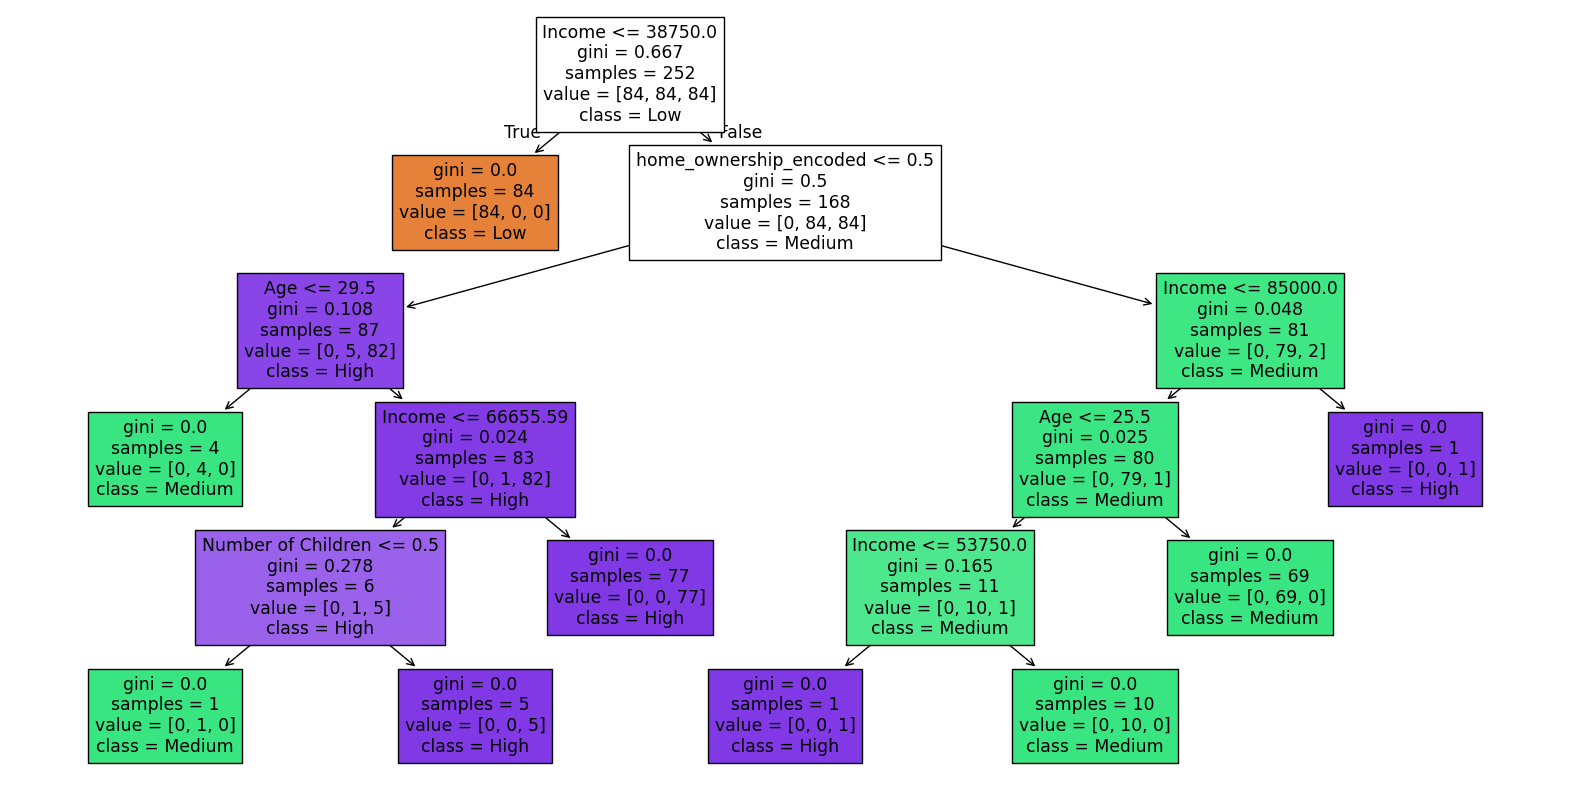

In [28]:
plt.figure(figsize=(20,10))
plot_tree(arvore_score, filled = True, feature_names= x_train.columns, class_names = ['Low', 'Medium', 'High'])
plt.show()

Nossa base de dados permitiu a visualização da árvore de decisão de forma satisfatória.

Apresentamos a árvore da base de treino pois ela tem mais informacões que a base de teste.

Deste modo, entendemos que nossa árvore tem nivel 8 de profundidade, pois possui "8 perguntas" que estão separando nossos dados (de acordo com a aula 2 do módulo: Árvore de decisão).

# 6) Identifique as 2 principais features do modelo.


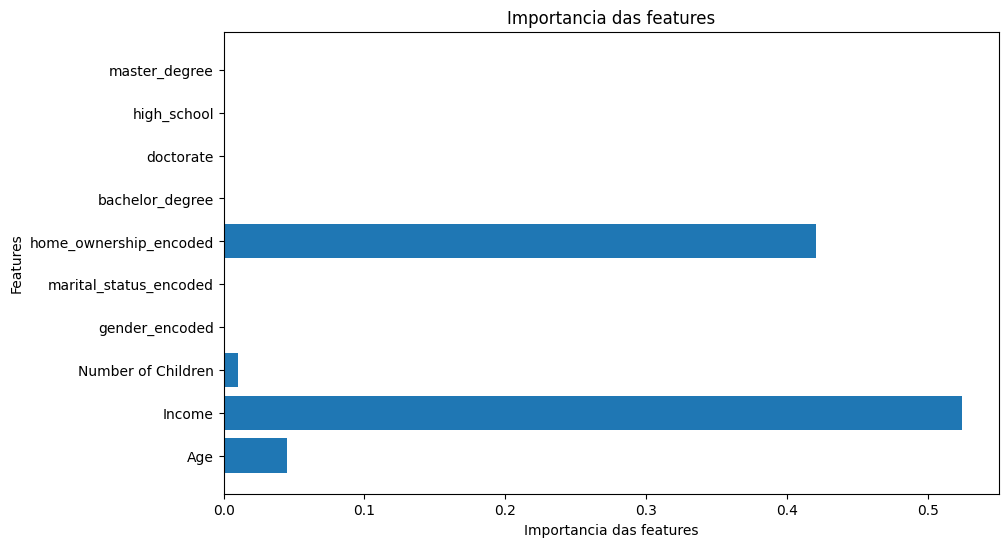

In [14]:
features_importantes = arvore_score.feature_importances_
nomes_features = x_train.columns
plt.figure(figsize=(10,6))
plt.barh(nomes_features, features_importantes)
plt.xlabel('Importancia das features')
plt.ylabel('Features')
plt.title('Importancia das features')
plt.show()


Após utilizar a ferramenta de features_importances_ notamos que o salário anual (Income) e tipo de moradia (própria ou alugada) são as features mais influentes no nosso modelo.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [15]:
x_train_reduzido = x_train[['home_ownership_encoded', 'Income']]
x_test_reduzido = x_test[['home_ownership_encoded', 'Income']]

arvore_score_reduzido = DecisionTreeClassifier(criterion = 'gini', random_state=0)
arvore_score_reduzido.fit(x_train_reduzido,y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
pred_reduzido = arvore_score_reduzido.predict(x_test_reduzido)
relatorio_reduzido = classification_report(y_test, pred_reduzido)
print('Relatório reduzido')
print(relatorio_reduzido)

Relatório reduzido
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.83      0.83      0.83         6
           2       0.97      0.97      0.97        29

    accuracy                           0.95        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.95      0.95      0.95        41



Nossas métricas cairam se comparadas ao modelo que utiliza todas as variáveis, exceto aqueles que eram classificados com baixo score bancário (0 - Low). No entanto, ainda temos bons indicies, acima de 83% para os com score médio e 97% de acertos para score alto.

Apesar de termos indices menores, nos tira um pouco da preocupação do overfitting.

In [17]:
conf_matrix = confusion_matrix(y_test, pred_reduzido)
conf_matrix

array([[ 6,  0,  0],
       [ 0,  5,  1],
       [ 0,  1, 28]])

In [18]:
import plotly.figure_factory as ff
class_names = ['Low', 'Medium', 'High']
fig = ff.create_annotated_heatmap(z = conf_matrix, x = class_names, y = class_names, colorscale='Viridis', showscale = True)
fig.update_layout(title_text='Matriz de confusão', xaxis_title='Valores previstos', yaxis_title='Valores reais')
fig.show()

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

Utilizando a matriz de confusão como parâmetro de comparação, podemos dizer que os resultados foram bem semelhantes. Apenas duas pessoas foram classificadas incorretamente na árvore de decisão reduzida, já no modelo de Naive Bayes, tivemos uma pessoa classificada incorretamente.
As métricas de acurácia e Recall estão acima de 90% em ambos os casos.
No entanto, acredito que o modelo da árvore não reduzida, com a totalidade de acertos, está livre do overfitting, pois apresentou os mesmos resultados na base de treinos e testes. Logo, seria o modelo recomendado para essa base utilizada.

In [ ]:
#Seu texto aqui